In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt

In [17]:
# read the data from csv file
df = pd.read_csv('./original data.csv', index_col=0)

In [19]:
# show the first 5 rows of the dataframe
df.head()

,#1,#2,#3,#4,#5,Average
H2O,0.581,0.580,0.583,0.582,0.583,0.5818
0.02 mol/L,0.552,0.553,0.553,0.554,0.552,0.5528
0.05 mol/L,0.497,0.498,0.497,0.498,0.498,0.4976
0.1 mol/L,0.450,0.450,0.448,0.449,0.453,0.4500
0.2 mol/L,0.369,0.368,0.369,0.368,0.369,0.3686


<font size = 1.5 face = 'Arial'>
the surface tension ($\gamma$) of $H_{2}O$ at 30°C is $\ 0.07118\ J\ m^{-2}$
</font>

In [22]:
pressure_list = df['Average'].tolist()
surface_tension_list = [round(0.07118*pressure_list[i]/pressure_list[0], 5) for i in range(len(pressure_list))]

In [66]:
def fitting_expression(x):
    return 0.02265-0.01666*np.log(x+0.04788)

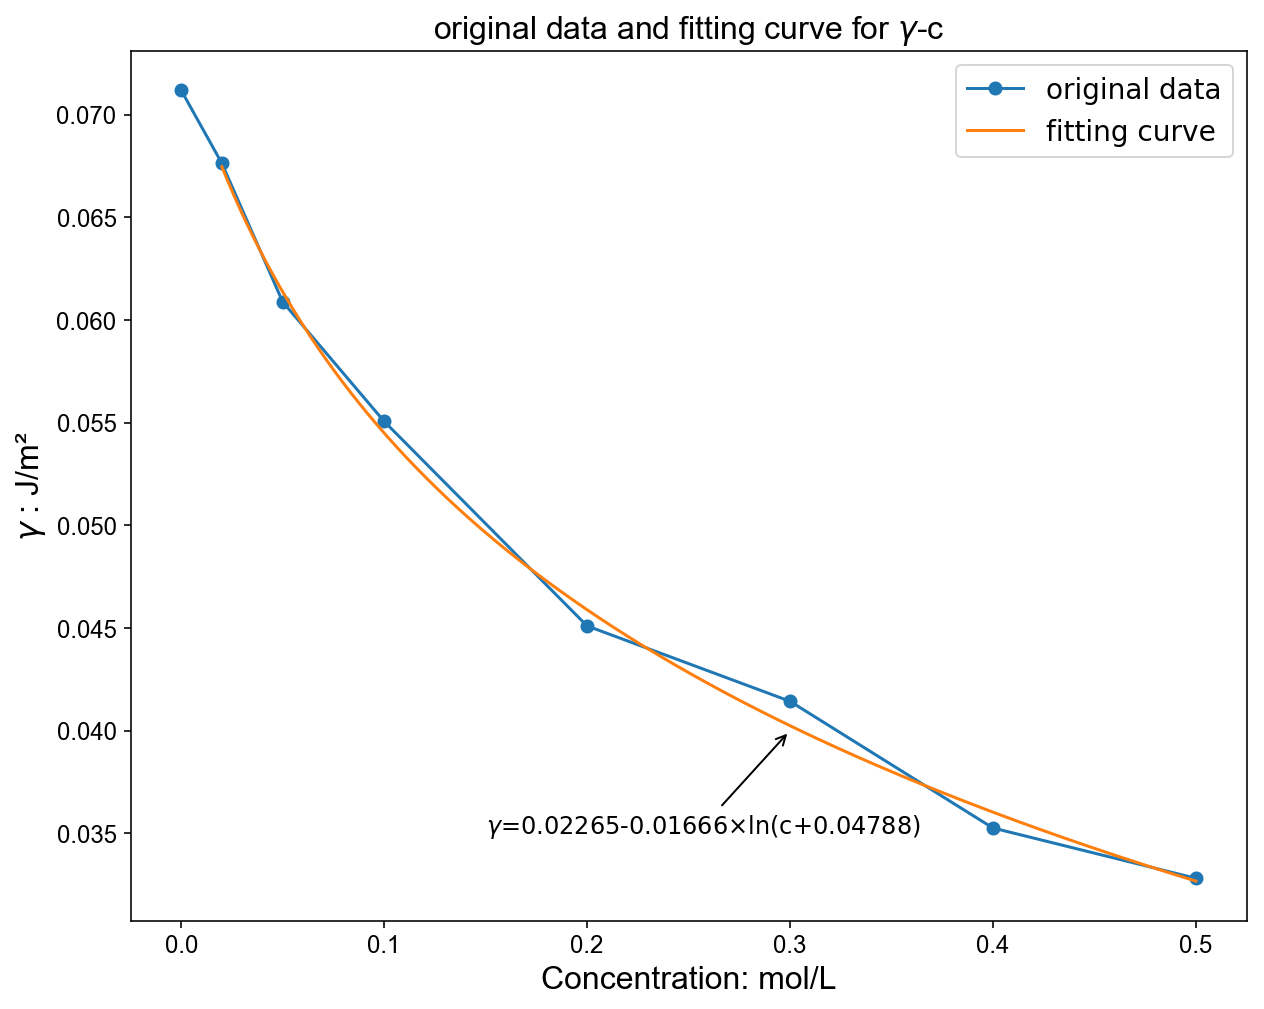

In [110]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(figsize=(10,8))
c_list = [0, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
c_fitting = np.linspace(0.02, 0.5, 1000)
ax.plot(c_list, surface_tension_list, '-o')
ax.plot(c_fitting, [fitting_expression(c) for c in c_fitting])
ax.legend(['original data', 'fitting curve'], fontsize = 14)
ax.set_xlabel('Concentration: mol/L', fontname='Arial', fontsize=16)
ax.set_ylabel('$\gamma$ : J/m²', fontname='Arial', fontsize=16)
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.title('original data and fitting curve for $\gamma$-c', fontsize = 16, fontname = 'Arial')
plt.annotate("$\gamma$=0.02265-0.01666×ln(c+0.04788)", xy=(0.3, 0.04), xytext=(0.15, 0.035), weight = 'regular', arrowprops={'arrowstyle':"->"}, fontsize=12)
plt.show()
fig.savefig('figures/gamma-c.png', dpi=600, format='png')

In [86]:
def fitting_derivative(x):
    return -0.01666*1/(x+0.04788)

In [87]:
def Captial_Gamma(c, slope):
    '''
    args: c(concentration), slope(=d($\gamma$)/dc)
    constants: R(ideal gas constant), T(temperature)
    return: the absorbance (denoted as $\Gamma$) at given concentration
    '''
    T = 273.15 + 30    # use Kelvin scale
    R = 8.314          # J/(mol·K)
    return -c*slope/(R*T)

In [88]:
captial_gamma_list = [Captial_Gamma(c, fitting_derivative(c)) for c in c_list[1:]]

In [90]:
c_divide_captial_gamma_list = [c_list[1:][i]/captial_gamma_list[i] for i in range(len(captial_gamma_list))]

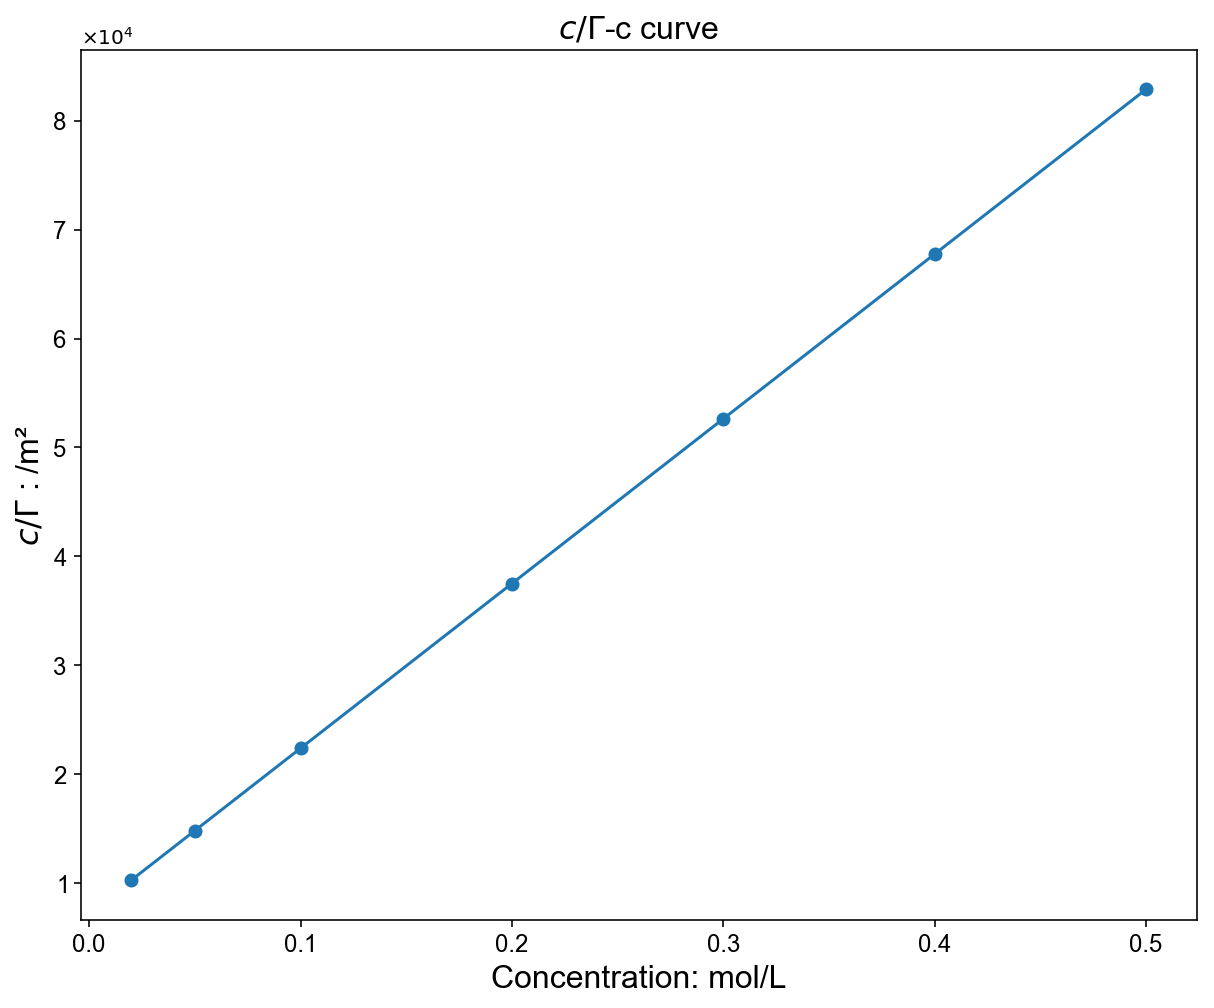

In [108]:
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(c_list[1:], c_divide_captial_gamma_list, '-o')
ax.set_xlabel('Concentration: mol/L', fontname='Arial', fontsize=16)
ax.set_ylabel('$c/\Gamma$ : /m²', fontname='Arial', fontsize=16)
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.title('$c/\Gamma$-c curve', fontsize = 16, fontname = 'Arial')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.show()
fig.savefig('figures/c÷Gamma-c.png', dpi=600, format='png')

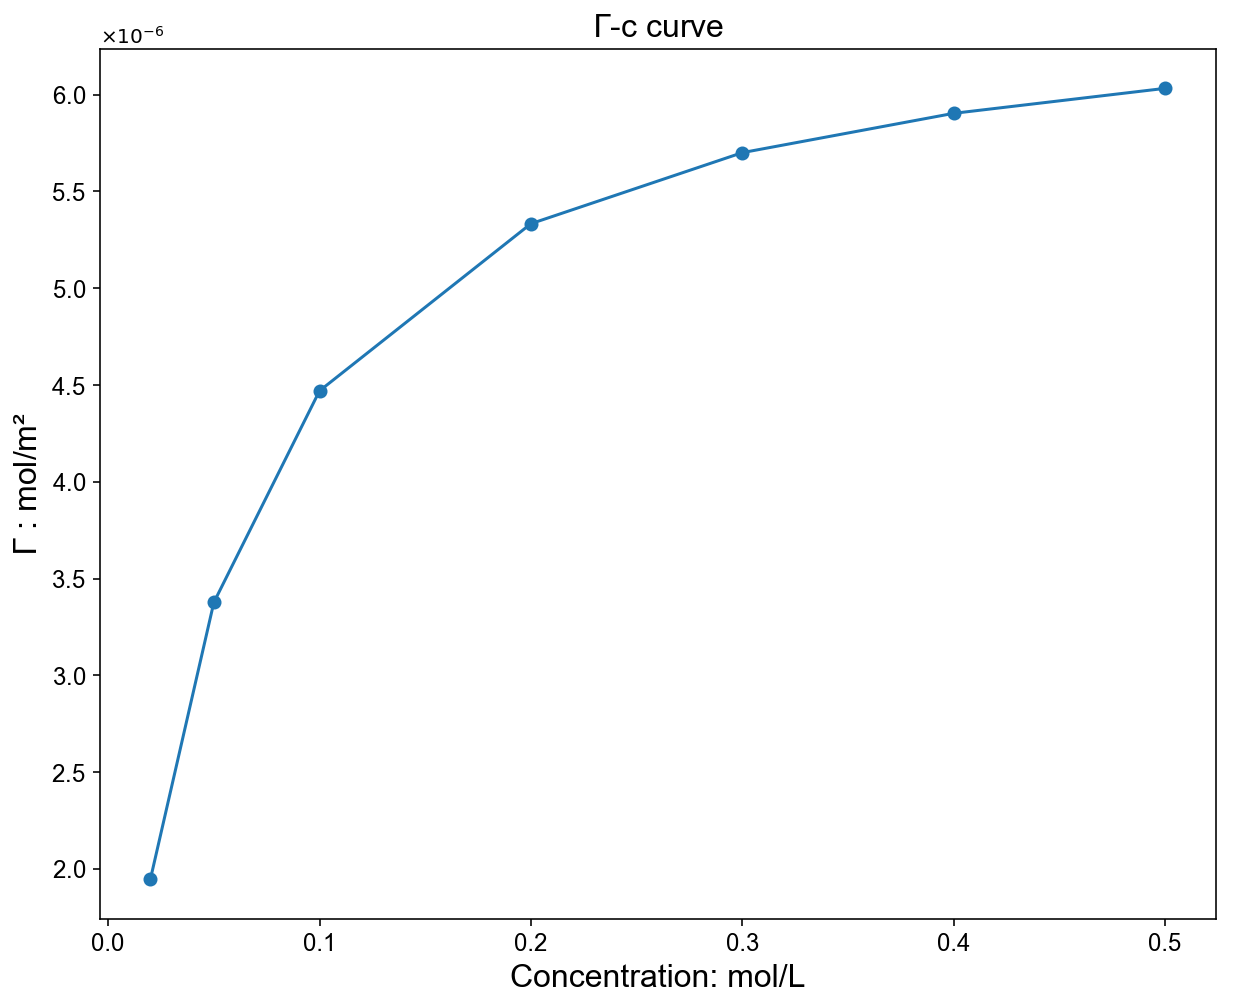

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(c_list[1:], captial_gamma_list, '-o')
ax.set_xlabel('Concentration: mol/L', fontname='Arial', fontsize=16)
ax.set_ylabel('$\Gamma$ : mol/m²', fontname='Arial', fontsize=16)
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.title('$\Gamma$-c curve', fontsize = 16, fontname = 'Arial')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.show()
fig.savefig('figures/capital_gamma-c.png', dpi=600, format='png')